In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [53]:
df = pd.read_csv("practice3/medium_data.csv")
df.info()
# df.head()

df.isna().sum()
# df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

In [58]:
def set_color(value: int):
    if value < 75:
        return "green"
    elif 75 <= value <= 150:
        return "blue"
    elif value > 150:
        return "red"

sir: pd.Series = df.date.value_counts()
date = []
counts = []
for x, y in sir.items():
    date.append(x)
    counts.append(y)

fig = go.Figure(
    data=go.Bar(
        x=date,
        y=counts,
        marker=dict(color=list(map(set_color, counts)))
    )
)

fig.update_layout(
    title='Количество записей публикаций по дням', title_font_size=20, title_x=0.55, title_y=0.95,
    xaxis_title='Дата публикаций', xaxis_title_font_size=16, xaxis_tickfont_size=14,
    yaxis_title='Кол-во статей', yaxis_title_font_size=16, yaxis_tickfont_size=14,
)
fig.update_yaxes(tickangle=-90)
fig.update_traces(base = 20)
fig.show()

In [55]:
# 3.1.
sir: pd.Series = df.publication.value_counts()
publications = []
counts = []
for x, y in sir.items():
    publications.append(x)
    counts.append(y)
fig = go.Figure(
    data=go.Pie(
        labels=publications,
        values=counts,
    )
)

fig.update_layout(
    title='Количество публикаций по публицистам', title_font_size=20, title_x=0.55, title_y=0.95,
)
fig.show()

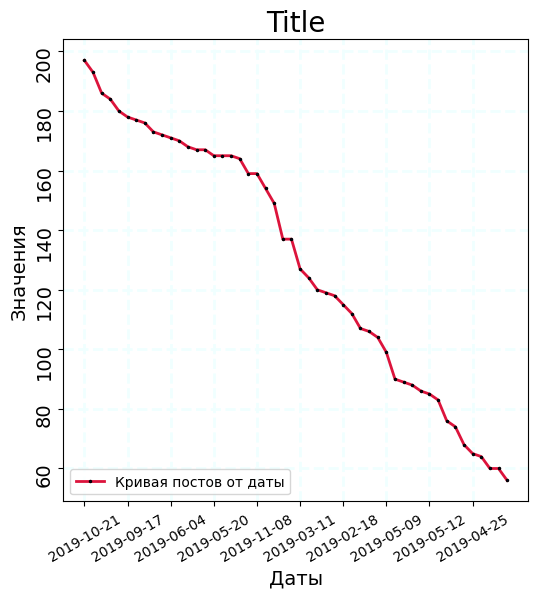

In [56]:
sir: pd.Series = df.date.value_counts()
date = []
counts = []
for x, y in sir.items():
    date.append(x)
    counts.append(y)

fig = plt.figure('График с заданными параметрами', figsize=(6, 6))
plt.grid(color='azure',  #  цвет линий
         linewidth=2,  #  толщина
         linestyle='--')
plt.title('Title', fontsize=20)
plt.xlabel('Даты', fontsize=14)
plt.ylabel('Значения', fontsize=14)
plt.xticks(
    np.arange(start=0, stop=len(date), step=5),
    rotation=30, size=10
)
plt.yticks(
    rotation=90, size=14
)
plt.plot(
    date,
    counts,
    marker='.',
    color='crimson',
    markerfacecolor='darkblue',
    markeredgecolor='black',
    linewidth=2,
    markersize=3,
    label='Кривая постов от даты'
)
plt.legend(loc='lower left')

plt.show()

In [57]:
# df.boxplot(column='reading_time')
reading_time = df.reading_time.loc[df.reading_time < 20]

box = go.Figure(
    data=go.Box(
        name='reading time',
        x=reading_time,
        boxmean='sd'  # represent mean and standard deviation
    )
)

box.update_layout(
    title='Время чтения статьи', title_font_size=20, title_x=0.5, title_y=0.95,
    xaxis_tickfont_size=14, yaxis_tickfont_size=14,

)

box.show()
